# Splitting Data

In [1]:
import pandas as pd
import math as ma
from pathlib import Path

In [2]:
path_1 = Path(r'C:\Users\stoic\Desktop\money\coding\2. Crypto\Backtesting\zzzzz Remaking Data')
df = pd.read_csv(path_1.joinpath("BTC_4H_OHLC_UTC.csv"))
df

,Timestamp,Open,High,Low,Close,Volume
0,2015-01-01 00:00:00,321.00,321.00,317.50,318.39,337.136393
1,2015-01-01 04:00:00,318.39,318.39,312.60,315.70,1148.301276
2,2015-01-01 08:00:00,315.70,318.25,314.34,315.57,1052.572365
3,2015-01-01 12:00:00,315.57,317.37,313.24,313.24,715.128419
4,2015-01-01 16:00:00,315.35,315.95,313.24,315.40,1031.987261
...,...,...,...,...,...,...
17496,2023-01-02 00:00:00,16617.17,16707.25,16548.70,16661.94,19463.475100
17497,2023-01-02 04:00:00,16662.38,16769.51,16619.44,16721.28,26026.881780
17498,2023-01-02 08:00:00,16721.27,16772.01,16704.07,16735.11,23267.941190
17499,2023-01-02 12:00:00,16735.51,16750.00,16669.15,16734.66,21747.214910


In [3]:
data_start = df.Timestamp.iloc[0]
data_start

'2015-01-01 00:00:00'

In [4]:
data_end = df.Timestamp.iloc[-1]
data_end

'2023-01-02 16:00:00'

# Optimizing

In [5]:
#Make the EMA just trade long signals, so no shorting
from IterativeOPTfilterEMAmacdproEXTRAtpslDiff import *

In [6]:
#Here I am defining the parameters that I need to pass when I call the function
symbol = "Close"
EMA_S = 12
EMA_L = 26
signal_mw = 9
EMA_Trend = 20
EMA_Trend_Two = 5
stop_loss = 18
take_profit = 22
start = data_start
end = data_end
amount = 3000
leverage = "100%"
fee = 0.001

In [7]:
#Make the EMA just trade long signals, so no shorting
optimizer = IterativeBacktest(symbol, start, end, amount, EMA_S, EMA_L, signal_mw, EMA_Trend, EMA_Trend_Two, stop_loss, take_profit, leverage, fee)

In [8]:
optimizer.data

,Open,High,Low,Close,Volume,returns,MACD,MACD_Signal,macdhist,EMA_Trend
Timestamp,,,,,,,,,,
2015-01-01 00:00:00,321.00,321.00,317.50,318.39,337.136393,NaN,NaN,NaN,NaN,NaN
2015-01-01 04:00:00,318.39,318.39,312.60,315.70,1148.301276,-0.008485,NaN,NaN,NaN,NaN
2015-01-01 08:00:00,315.70,318.25,314.34,315.57,1052.572365,-0.000412,NaN,NaN,NaN,NaN
2015-01-01 12:00:00,315.57,317.37,313.24,313.24,715.128419,-0.007411,NaN,NaN,NaN,NaN
2015-01-01 16:00:00,315.35,315.95,313.24,315.40,1031.987261,0.006872,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-01-02 00:00:00,16617.17,16707.25,16548.70,16661.94,19463.475100,0.002716,-13.269206,-31.390804,18.121598,16589.481292
2023-01-02 04:00:00,16662.38,16769.51,16619.44,16721.28,26026.881780,0.003555,-1.535058,-25.419655,23.884596,16602.033549
2023-01-02 08:00:00,16721.27,16772.01,16704.07,16735.11,23267.941190,0.000827,8.779103,-18.579903,27.359006,16614.707497


In [9]:
optimizer.test_emamacd_strategy()

---------------------------------------------------------------------------
Testing MACD + EMA strategy | Close | EMA_S = 12 & EMA_L = 26, signal_mw = 9, EMA_Trend = 20, stop_loss = 0.18%, take_profit = 0.22%, EMA_Trend_Two = 5
---------------------------------------------------------------------------
2015-01-15 16:00:00 |  Buying 13.568453458891707 for 220.88
2015-01-24 08:00:00 |  Selling 13.568453458891707 for 232.99. Trigger TA
2015-01-24 16:00:00 |  Buying 13.061995962401157 for 241.54
2015-01-26 04:00:00 |  Selling 13.061995962401157 for 295.24. Trigger take-profit
2015-02-11 04:00:00 |  Buying 17.261132425829157 for 222.97
2015-02-15 20:00:00 |  Selling 17.261132425829157 for 234.13. Trigger TA
2015-02-18 00:00:00 |  Buying 16.482510332401294 for 244.7
2015-02-18 16:00:00 |  Selling 16.482510332401294 for 237.41. Trigger TA
2015-02-20 04:00:00 |  Buying 16.05661732411865 for 243.22
2015-02-22 12:00:00 |  Selling 16.05661732411865 for 245.2. Trigger TA
2015-02-24 20:00:00 |  Buy

2016-04-04 12:00:00 |  Selling 14.529917142834021 for 417.41. Trigger TA
2016-04-04 16:00:00 |  Buying 14.435853261689719 for 419.29
2016-04-07 00:00:00 |  Selling 14.435853261689719 for 421.03. Trigger TA
2016-04-10 12:00:00 |  Buying 14.442327433569005 for 420.0
2016-04-13 20:00:00 |  Selling 14.442327433569005 for 424.41. Trigger TA
2016-04-15 12:00:00 |  Buying 14.275881865057285 for 428.5
2016-04-17 08:00:00 |  Selling 14.275881865057285 for 428.69. Trigger TA
2016-04-24 08:00:00 |  Buying 13.463746717806501 for 453.64
2016-04-24 16:00:00 |  Selling 13.463746717806501 for 450.25. Trigger TA
2016-04-24 20:00:00 |  Buying 13.009211735996026 for 465.05
2016-04-27 08:00:00 |  Selling 13.009211735996026 for 467.08. Trigger TA
2016-04-30 00:00:00 |  Buying 13.283236608232412 for 456.53
2016-05-01 00:00:00 |  Selling 13.283236608232412 for 448.4. Trigger TA
2016-05-01 16:00:00 |  Buying 13.12496543330635 for 452.9
2016-05-02 12:00:00 |  Selling 13.12496543330635 for 442.86. Trigger TA
20

2017-07-20 12:00:00 |  Selling 8.338012659232406 for 2521.1666. Trigger take-profit
2017-07-31 12:00:00 |  Buying 7.576588218194824 for 2768.99
2017-08-01 16:00:00 |  Selling 7.576588218194824 for 2676.0. Trigger TA
2017-08-03 20:00:00 |  Buying 7.252506441491061 for 2789.99
2017-08-07 12:00:00 |  Selling 7.252506441491061 for 3403.7878. Trigger take-profit
2017-08-11 16:00:00 |  Buying 6.953611528386026 for 3543.0
2017-08-14 16:00:00 |  Selling 6.953611528386026 for 4312.8098. Trigger take-profit
2017-08-17 12:00:00 |  Buying 6.794473263729885 for 4405.0
2017-08-17 20:00:00 |  Selling 6.794473263729885 for 4306.4. Trigger TA
2017-08-23 00:00:00 |  Buying 7.160674223472336 for 4078.0
2017-08-26 16:00:00 |  Selling 7.160674223472336 for 4295.11. Trigger TA
2017-08-29 16:00:00 |  Buying 6.707311746477203 for 4576.26
2017-09-02 12:00:00 |  Selling 6.707311746477203 for 4700.15. Trigger TA
2017-09-11 04:00:00 |  Buying 7.289194932689044 for 4316.3
2017-09-11 08:00:00 |  Selling 7.289194932

2019-08-05 04:00:00 |  Buying 29.139175951158713 for 11564.87
2019-08-06 20:00:00 |  Selling 29.139175951158713 for 11709.62. Trigger TA
2019-09-06 16:00:00 |  Buying 31.404825115523124 for 10843.13
2019-09-06 20:00:00 |  Selling 31.404825115523124 for 10374.17. Trigger TA
2019-09-20 00:00:00 |  Buying 31.741238261425433 for 10243.7
2019-09-21 16:00:00 |  Selling 31.741238261425433 for 10038.43. Trigger TA
2019-10-07 16:00:00 |  Buying 38.887893900017254 for 8177.23
2019-10-11 12:00:00 |  Selling 38.887893900017254 for 8299.43. Trigger TA
2019-10-25 16:00:00 |  Buying 38.981499502167175 for 8262.95
2019-10-26 00:00:00 |  Selling 38.981499502167175 for 10081.0552. Trigger take-profit
2019-11-02 16:00:00 |  Buying 42.0667887236255 for 9323.01
2019-11-03 12:00:00 |  Selling 42.0667887236255 for 9155.26. Trigger TA
2019-11-25 16:00:00 |  Buying 52.99176348340233 for 7253.25
2019-11-30 20:00:00 |  Selling 52.99176348340233 for 7506.4. Trigger TA
2019-12-04 16:00:00 |  Buying 53.166454139851

2021-07-26 00:00:00 |  Selling 33.80707462732204 for 37597.7648. Trigger take-profit
2021-07-28 00:00:00 |  Buying 32.149988825794054 for 39456.61
2021-07-29 04:00:00 |  Selling 32.149988825794054 for 39609.78. Trigger TA
2021-07-31 08:00:00 |  Buying 30.594580297483603 for 41540.31
2021-07-31 20:00:00 |  Selling 30.594580297483603 for 41303.64. Trigger TA
2021-08-01 04:00:00 |  Buying 29.722584796252722 for 42430.41
2021-08-01 08:00:00 |  Selling 29.722584796252722 for 41701.25. Trigger TA
2021-08-04 20:00:00 |  Buying 31.117577752993196 for 39752.17
2021-08-09 00:00:00 |  Selling 31.117577752993196 for 43794.36. Trigger TA
2021-08-09 16:00:00 |  Buying 29.649611569812503 for 45870.76
2021-08-10 12:00:00 |  Selling 29.649611569812503 for 45345.05. Trigger TA
2021-08-13 20:00:00 |  Buying 28.88031813566847 for 46459.86
2021-08-15 08:00:00 |  Selling 28.88031813566847 for 45738.34. Trigger TA
2021-08-16 12:00:00 |  Buying 27.743726302188712 for 47516.95
2021-08-16 16:00:00 |  Selling 27

30127.140009267707

In [10]:
#pd.set_option('display.max_rows', None)

In [11]:
#optimizer.data.loc["2015-11"]

In [12]:
#optimizer.get_trades()

In [13]:
optimizer.current_balance

906814.2002780312

In [14]:
optimizer.annual_returns()

1.046480265494142

In [15]:
optimizer.get_drawdown()

(0.36951148324098704, '2022-10-28 00:00:00')

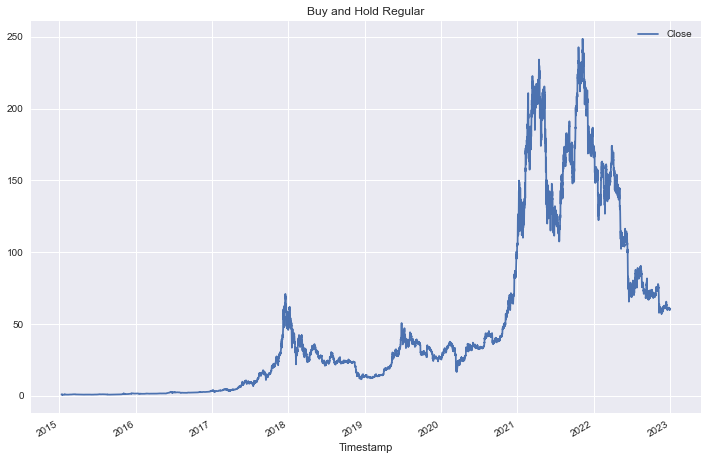

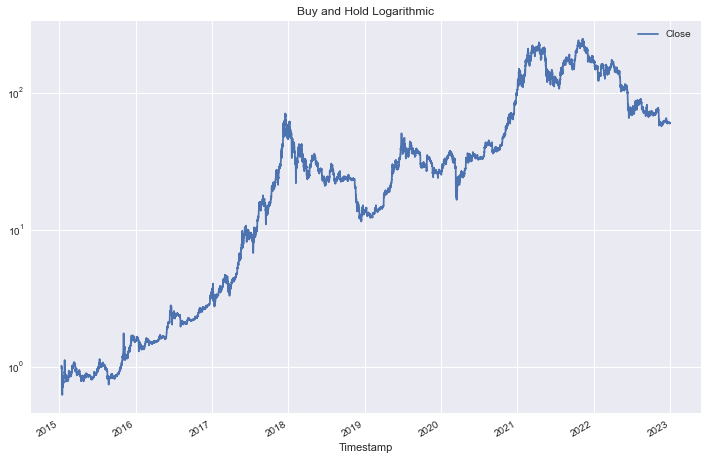

In [16]:
optimizer.plot_data()

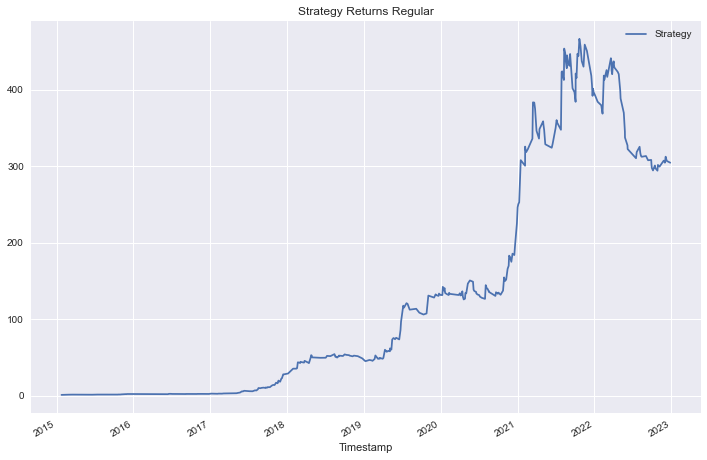

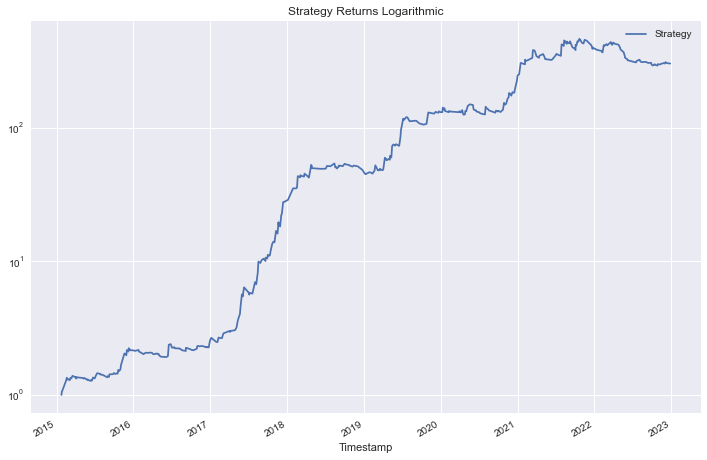

In [17]:
optimizer.plot_strategy()

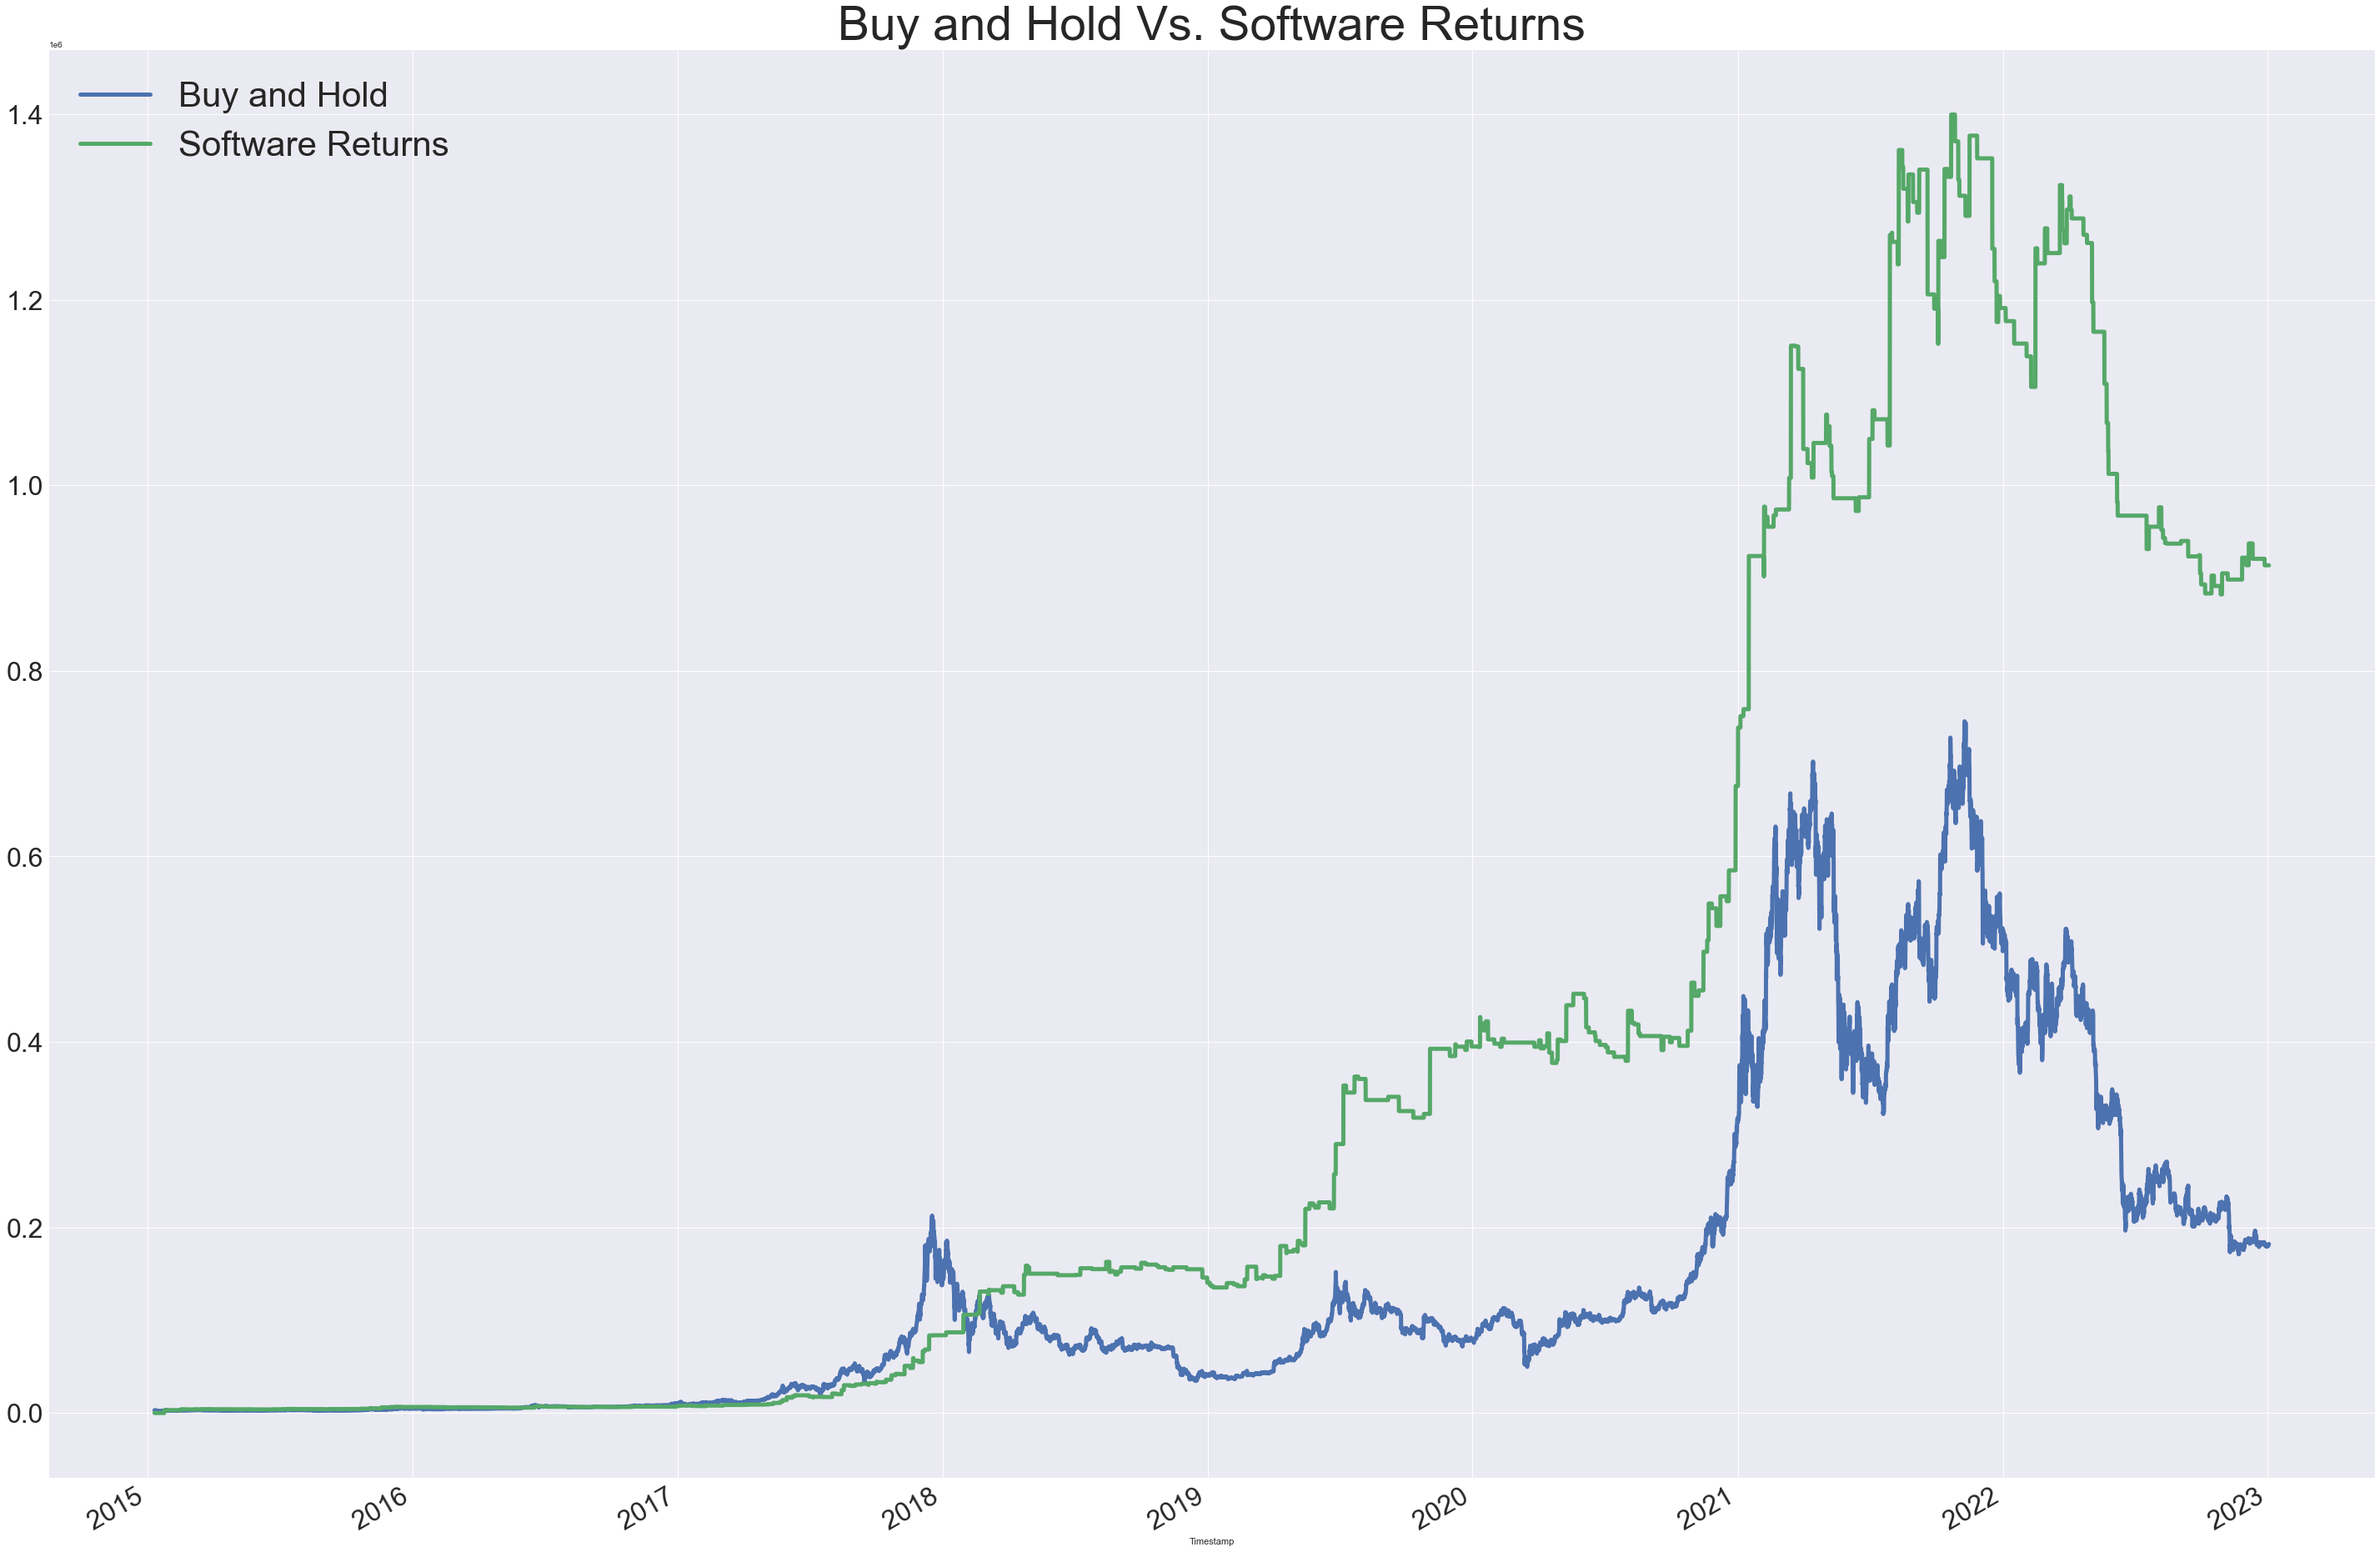

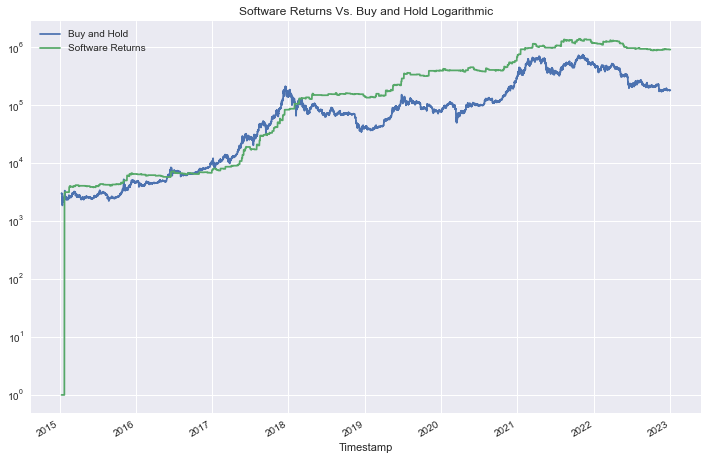

In [18]:
optimizer.plot_all()

In [19]:
optimizer.get_time_no_profit()

240.0

In [20]:
optimizer.results

,Balance,Buy_price,Amount,Sell_price,Profit_$,Date_buy,Date_sell
0,3000.000000,220.88,13.568453,232.99,164.313971,2015-01-15 16:00:00,2015-01-24 08:00:00
1,3158.152657,241.54,13.061996,295.24,701.429183,2015-01-24 16:00:00,2015-01-26 04:00:00
2,3852.567264,222.97,17.261132,234.13,192.634238,2015-02-11 04:00:00,2015-02-15 20:00:00
3,4037.307586,244.70,16.482510,237.41,-120.157500,2015-02-18 00:00:00,2015-02-18 16:00:00
4,3909.199665,243.22,16.056617,245.20,31.792102,2015-02-20 04:00:00,2015-02-22 12:00:00
...,...,...,...,...,...,...,...
414,913843.542374,16496.73,55.340040,16955.42,25383.922969,2022-11-29 12:00:00,2022-12-02 08:00:00
415,937375.308179,17197.22,54.452867,16926.65,-14733.312215,2022-12-05 04:00:00,2022-12-05 20:00:00
416,920782.916035,17251.32,53.321261,17153.81,-5199.356142,2022-12-08 20:00:00,2022-12-11 04:00:00
417,913748.114200,16894.54,54.031324,16799.92,-5112.443885,2022-12-26 04:00:00,2022-12-27 16:00:00


In [21]:
optimizer.sortino()

3.7469574043292546

In [22]:
optimizer.sharpe()

0.921920183539004

In [23]:
abs(optimizer.results["Profit_$"])/optimizer.results["Balance"]

0      0.054771
1      0.222101
2      0.050002
3      0.029762
4      0.008133
         ...   
414    0.027777
415    0.015718
416    0.005647
417    0.005595
418         NaN
Length: 419, dtype: float64

In [24]:
3000/15.604965

192.2465061600587